In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
train_df = pd.read_csv('train_FD003.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df = train_df.sort_values(['id','cycle'])
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [4]:
test_df = pd.read_csv('inj_con_biased.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0018,0.0002,100,518.67,642.61,1587.18,1399.82,14.62,...,521.87,2388.03,8144.16,8.4147,0.03,391,2388,100,39.04,23.3756
1,1,2,-0.0004,0.0000,100,518.67,642.09,1578.49,1400.30,14.62,...,522.48,2388.00,8138.54,8.3694,0.03,391,2388,100,39.19,23.4363
2,1,3,-0.0021,-0.0003,100,518.67,642.04,1577.27,1395.02,14.62,...,522.79,2388.02,8137.55,8.3914,0.03,393,2388,100,38.99,23.3413
3,1,4,-0.0029,-0.0001,100,518.67,642.12,1575.94,1403.27,14.62,...,522.20,2388.00,8133.38,8.3844,0.03,392,2388,100,39.07,23.3753
4,1,5,0.0030,-0.0001,100,518.67,642.07,1584.32,1402.06,14.62,...,522.08,2388.01,8145.54,8.4168,0.03,393,2388,100,39.02,23.4244


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        6833 non-null   int64  
 1   cycle     6833 non-null   int64  
 2   setting1  6833 non-null   float64
 3   setting2  6833 non-null   float64
 4   setting3  6833 non-null   int64  
 5   s1        6833 non-null   float64
 6   s2        6833 non-null   float64
 7   s3        6833 non-null   float64
 8   s4        6833 non-null   float64
 9   s5        6833 non-null   float64
 10  s6        6833 non-null   float64
 11  s7        6833 non-null   float64
 12  s8        6833 non-null   float64
 13  s9        6833 non-null   float64
 14  s10       6833 non-null   float64
 15  s11       6833 non-null   float64
 16  s12       6833 non-null   float64
 17  s13       6833 non-null   float64
 18  s14       6833 non-null   float64
 19  s15       6833 non-null   float64
 20  s16       6833 non-null   floa

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        24720 non-null  int64  
 1   cycle     24720 non-null  int64  
 2   setting1  24720 non-null  float64
 3   setting2  24720 non-null  float64
 4   setting3  24720 non-null  float64
 5   s1        24720 non-null  float64
 6   s2        24720 non-null  float64
 7   s3        24720 non-null  float64
 8   s4        24720 non-null  float64
 9   s5        24720 non-null  float64
 10  s6        24720 non-null  float64
 11  s7        24720 non-null  float64
 12  s8        24720 non-null  float64
 13  s9        24720 non-null  float64
 14  s10       24720 non-null  float64
 15  s11       24720 non-null  float64
 16  s12       24720 non-null  float64
 17  s13       24720 non-null  float64
 18  s14       24720 non-null  float64
 19  s15       24720 non-null  float64
 20  s16       24720 non-null  fl

In [7]:
pm_truth=pd.read_csv('RUL_FD003.txt',sep=' ',header=None).drop([1],axis=1)
pm_truth.columns=['more']
pm_truth['id']=pm_truth.index+1
pm_truth.head()


,more,id
0,44,1
1,51,2
2,27,3
3,120,4
4,101,5


In [8]:
# generate column max for test data
# max = max no. of cycles that a engine has cmplted
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head()

,id,max
0,1,160
1,2,166
2,3,192
3,4,217
4,5,195


In [9]:
# run to failure = total cycles of a engine

pm_truth['rtf']=pm_truth['more']+rul['max']
pm_truth.head()

,more,id,rtf
0,44,1,204.0
1,51,2,217.0
2,27,3,219.0
3,120,4,337.0
4,101,5,296.0


In [10]:
pm_truth.drop('more', axis=1, inplace=True)
test_df=test_df.merge(pm_truth,on=['id'],how='left')
test_df['ttf']=test_df['rtf'] - test_df['cycle']

#ttf = true lifetime of a engine 

test_df.drop('rtf', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,0.0018,0.0002,100,518.67,642.61,1587.18,1399.82,14.62,...,2388.03,8144.16,8.4147,0.03,391,2388,100,39.04,23.3756,203.0
1,1,2,-0.0004,0.0000,100,518.67,642.09,1578.49,1400.30,14.62,...,2388.00,8138.54,8.3694,0.03,391,2388,100,39.19,23.4363,202.0
2,1,3,-0.0021,-0.0003,100,518.67,642.04,1577.27,1395.02,14.62,...,2388.02,8137.55,8.3914,0.03,393,2388,100,38.99,23.3413,201.0
3,1,4,-0.0029,-0.0001,100,518.67,642.12,1575.94,1403.27,14.62,...,2388.00,8133.38,8.3844,0.03,392,2388,100,39.07,23.3753,200.0
4,1,5,0.0030,-0.0001,100,518.67,642.07,1584.32,1402.06,14.62,...,2388.01,8145.54,8.4168,0.03,393,2388,100,39.02,23.4244,199.0


In [11]:
train_df['ttf'] = train_df.groupby(['id'])['cycle'].transform(max)-train_df['cycle']
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254


In [12]:
df_train=train_df.copy()
df_test=test_df.copy()
period=30
df_train['label_bc'] = df_train['ttf'].apply(lambda x: 1 if x <= period else 0)
df_test['label_bc'] = df_test['ttf'].apply(lambda x: 1 if x <= period else 0)
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258,0
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257,0
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256,0
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255,0
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4,1
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3,1
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2,1
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1,1


In [13]:
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,0.0018,0.0002,100,518.67,642.61,1587.18,1399.82,14.62,...,8144.16,8.4147,0.03,391,2388,100,39.04,23.3756,203.0,0
1,1,2,-0.0004,0.0000,100,518.67,642.09,1578.49,1400.30,14.62,...,8138.54,8.3694,0.03,391,2388,100,39.19,23.4363,202.0,0
2,1,3,-0.0021,-0.0003,100,518.67,642.04,1577.27,1395.02,14.62,...,8137.55,8.3914,0.03,393,2388,100,38.99,23.3413,201.0,0
3,1,4,-0.0029,-0.0001,100,518.67,642.12,1575.94,1403.27,14.62,...,8133.38,8.3844,0.03,392,2388,100,39.07,23.3753,200.0,0
4,1,5,0.0030,-0.0001,100,518.67,642.07,1584.32,1402.06,14.62,...,8145.54,8.4168,0.03,393,2388,100,39.02,23.4244,199.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828,37,194,0.0049,0.0000,100,518.67,643.11,1599.45,1415.79,14.62,...,8211.64,8.4715,0.03,394,2388,100,38.65,23.1974,149.0,0
6829,37,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,...,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771,148.0,0
6830,37,196,-0.0006,-0.0003,100,518.67,643.31,1593.15,1406.82,14.62,...,8215.60,8.4569,0.03,395,2388,100,38.62,23.2051,147.0,0
6831,37,197,-0.0038,0.0001,100,518.67,643.13,1594.99,1419.36,14.62,...,8218.84,8.4711,0.03,395,2388,100,38.66,23.2699,146.0,0


In [14]:
train_failure=df_train[df_train['label_bc']==0]
test_failure=df_test[df_test['label_bc']==0]

train_nonfail=df_train[df_train['label_bc']==1]
test_nonfail=df_test[df_test['label_bc']==1]

train_failure.shape,test_failure.shape,train_nonfail.shape,test_nonfail.shape

((21620, 28), (6774, 28), (3100, 28), (59, 28))

In [15]:
train_failure=train_failure.sample(train_nonfail.shape[0],random_state=42)
train_failure.shape,train_nonfail.shape

((3100, 28), (3100, 28))

In [16]:
test_failure=test_failure.sample(test_nonfail.shape[0],random_state=42)
test_failure.shape

(59, 28)

In [17]:
df_train=pd.concat([train_failure,train_nonfail],ignore_index=True)
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,4,95,-0.0013,0.0003,100.0,518.67,642.49,1588.08,1408.55,14.62,...,8124.72,8.4512,0.03,395,2388,100.0,38.86,23.2759,177,0
1,11,66,-0.0000,0.0002,100.0,518.67,641.92,1575.50,1392.44,14.62,...,8131.82,8.3584,0.03,390,2388,100.0,39.01,23.4670,131,0
2,17,223,0.0028,0.0000,100.0,518.67,642.74,1587.83,1394.02,14.62,...,8139.49,8.3681,0.03,392,2388,100.0,39.14,23.4604,89,0
3,55,341,0.0008,-0.0004,100.0,518.67,641.87,1580.56,1393.26,14.62,...,8134.95,8.3681,0.03,391,2388,100.0,39.02,23.3001,184,0
4,94,61,-0.0011,0.0001,100.0,518.67,642.61,1588.05,1400.24,14.62,...,8145.06,8.3278,0.03,393,2388,100.0,39.38,23.5589,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4,1
6196,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3,1
6197,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2,1
6198,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1,1


In [18]:
df_test=pd.concat([test_failure,test_nonfail],ignore_index=True)
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,14,67,-0.0004,-0.0003,100,518.67,641.86,1580.02,1402.77,14.62,...,8129.47,8.4201,0.03,393,2388,100,38.95,23.3341,120.0,0
1,37,195,-0.0011,-0.0001,100,518.67,643.09,1595.69,1422.05,14.62,...,8209.21,8.4512,0.03,395,2388,100,38.57,23.2771,148.0,0
2,11,87,-0.0034,0.0003,100,518.67,642.09,1582.69,1400.72,14.62,...,8145.36,8.4240,0.03,394,2388,100,38.90,23.3501,186.0,0
3,4,21,0.0015,-0.0004,100,518.67,641.97,1586.92,1398.68,14.62,...,8137.84,8.4121,0.03,392,2388,100,39.12,23.3504,316.0,0
4,8,71,-0.0008,-0.0001,100,518.67,642.16,1590.26,1399.99,14.62,...,8152.63,8.4134,0.03,391,2388,100,38.95,23.3899,170.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,26,183,-0.0015,-0.0002,100,518.67,643.51,1602.59,1419.78,14.62,...,8154.23,8.4721,0.03,395,2388,100,38.66,23.1341,15.0,1
114,26,184,-0.0005,-0.0004,100,518.67,643.76,1602.40,1424.52,14.62,...,8161.06,8.5252,0.03,397,2388,100,38.60,23.1102,14.0,1
115,26,185,-0.0024,-0.0001,100,518.67,643.75,1591.63,1419.81,14.62,...,8154.85,8.5025,0.03,396,2388,100,38.57,23.2824,13.0,1
116,26,186,-0.0034,0.0002,100,518.67,643.19,1605.18,1422.23,14.62,...,8153.43,8.5229,0.03,397,2388,100,38.35,23.0967,12.0,1


In [19]:
df_train['label_bc'].value_counts()

0    3100
1    3100
Name: label_bc, dtype: int64

In [20]:
df_test['label_bc'].value_counts()

0    59
1    59
Name: label_bc, dtype: int64

In [21]:
X_train=df_train.drop('label_bc',axis=1)
y_train=df_train['label_bc']
X_train,y_train

(       id  cycle  setting1  setting2  setting3      s1      s2       s3  \
 0       4     95   -0.0013    0.0003     100.0  518.67  642.49  1588.08   
 1      11     66   -0.0000    0.0002     100.0  518.67  641.92  1575.50   
 2      17    223    0.0028    0.0000     100.0  518.67  642.74  1587.83   
 3      55    341    0.0008   -0.0004     100.0  518.67  641.87  1580.56   
 4      94     61   -0.0011    0.0001     100.0  518.67  642.61  1588.05   
 ...   ...    ...       ...       ...       ...     ...     ...      ...   
 6195  100    148   -0.0016   -0.0003     100.0  518.67  643.78  1596.01   
 6196  100    149    0.0034   -0.0003     100.0  518.67  643.29  1596.38   
 6197  100    150   -0.0016    0.0004     100.0  518.67  643.84  1604.53   
 6198  100    151   -0.0023    0.0004     100.0  518.67  643.94  1597.56   
 6199  100    152    0.0000    0.0003     100.0  518.67  643.64  1599.04   
 
            s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
 0    

In [22]:
X_test=df_test.drop('label_bc',axis=1)
y_test=df_test['label_bc']

In [23]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [25]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape,X_test.shape

((6200, 27, 1), (118, 27, 1))

In [26]:
epochs=20
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27, 16)            32        
                                                                 
 batch_normalization (BatchN  (None, 27, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 27, 16)            0         
                                                                 
 dense_1 (Dense)             (None, 27, 8)             136       
                                                                 
 batch_normalization_1 (Batc  (None, 27, 8)            32        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 27, 8)             0

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,y_train ,epochs=epochs,validation_data=(X_test,y_test),verbose=1,batch_size=32)

Epoch 1/20
194/194 [==============================] - 2s 4ms/step - loss: 0.4530 - accuracy: 0.8040 - val_loss: 0.6695 - val_accuracy: 0.5339
Epoch 2/20
194/194 [==============================] - 1s 3ms/step - loss: 0.2414 - accuracy: 0.9261 - val_loss: 0.8281 - val_accuracy: 0.5847
Epoch 3/20
194/194 [==============================] - 1s 3ms/step - loss: 0.1946 - accuracy: 0.9356 - val_loss: 0.8042 - val_accuracy: 0.6525
Epoch 4/20
194/194 [==============================] - 1s 3ms/step - loss: 0.1750 - accuracy: 0.9389 - val_loss: 0.6645 - val_accuracy: 0.6610
Epoch 5/20
194/194 [==============================] - 1s 3ms/step - loss: 0.1689 - accuracy: 0.9373 - val_loss: 0.5734 - val_accuracy: 0.7203
Epoch 6/20
194/194 [==============================] - 1s 3ms/step - loss: 0.1552 - accuracy: 0.9424 - val_loss: 0.7153 - val_accuracy: 0.6610
Epoch 7/20
194/194 [==============================] - 1s 3ms/step - loss: 0.1470 - accuracy: 0.9442 - val_loss: 0.7616 - val_accuracy: 0.6610
Epoch 

In [30]:
acc=model.evaluate(X_train,y_train)
print("Accuracy=",acc[1])

194/194 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9621
Accuracy= 0.9620967507362366


In [31]:
def plot_lc(history,epochs):
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title("model accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend(["train","val"],loc='upper left')
    plt.show()
    
    
   
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title("model loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["train","val"],loc='upper left')
    plt.show()
    
    

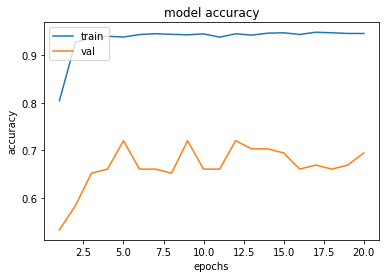

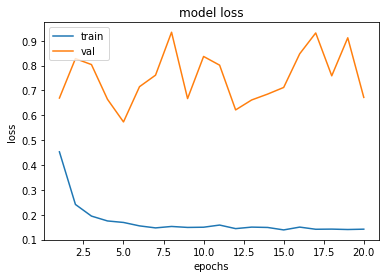

In [32]:
plot_lc(history,epochs)

In [33]:
y_pred=(model.predict(X_test)>0.5).astype("int32")
print('Accuracy of model on test data: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

4/4 [==============================] - 0s 0s/step
Accuracy of model on test data:  0.6949152542372882
Confusion Matrix: 
 [[56  3]
 [33 26]]
